In [ ]:
# python pandas help you in the timeseries analysis

In [10]:
import pandas as pd

data = pd.read_csv('lemonade_data.csv')

In [11]:
data.head(5)

,Index,Date,Customer name,Lemonades
0,0,2025-10-16,Rahul Singh,12
1,1,2024-04-24,Vikram Sahay,4
2,2,2024-01-26,Isha Kumar,6
3,3,2024-10-08,Ananya Sahay,2
4,4,2024-09-07,Ananya Gupta,13


In [12]:
# to remove the index

data.drop(columns='Index', inplace=True)

In [13]:
data.head(5)

,Date,Customer name,Lemonades
0,2025-10-16,Rahul Singh,12
1,2024-04-24,Vikram Sahay,4
2,2024-01-26,Isha Kumar,6
3,2024-10-08,Ananya Sahay,2
4,2024-09-07,Ananya Gupta,13


In [14]:
# in the time series data the index must be the date / date time
# of the dataset column

data.set_index('Date',inplace=True)

In [15]:
data.head(5)

,Customer name,Lemonades
Date,,
2025-10-16,Rahul Singh,12
2024-04-24,Vikram Sahay,4
2024-01-26,Isha Kumar,6
2024-10-08,Ananya Sahay,2
2024-09-07,Ananya Gupta,13


In [20]:
data.index.dtype

dtype('O')

In [ ]:
# dtype('O') this is an object of type string so need to make it converted to the date time format

In [22]:
data.index = pd.to_datetime(data.index)

In [23]:
data.head(5)

,Customer name,Lemonades
Date,,
2025-10-16,Rahul Singh,12
2024-04-24,Vikram Sahay,4
2024-01-26,Isha Kumar,6
2024-10-08,Ananya Sahay,2
2024-09-07,Ananya Gupta,13


In [ ]:
data.index.dtype #this means that now its timeseries datetime64 ns

dtype('<M8[ns]')

In [ ]:
#resampling , we want the data week wise 
#  1 single week into a single entry 
# weekly , annually , monthly we do the sampling of the data

In [34]:
# data.resample('W')['Lemonades'].sum() #weekly
# data.resample('A')['Lemonades'].sum() #Annually (scheduled for removal)
# data.resample('YE')['Lemonades'].sum() #Yearly 
data.resample('W')['Lemonades'].sum() #Yearly 

Date
2024-01-07     9
2024-01-14    15
2024-01-21    15
2024-01-28    19
2024-02-04    26
              ..
2025-11-30    48
2025-12-07    25
2025-12-14     0
2025-12-21    21
2025-12-28     1
Freq: W-SUN, Name: Lemonades, Length: 104, dtype: int64

In [31]:
# shifting and lagging

data['Previous Lemonades'] = data['Lemonades'].shift(1)
data.head(5)

,Customer name,Lemonades,Previous Lemonades
Date,,,
2025-10-16,Rahul Singh,12,NaN
2024-04-24,Vikram Sahay,4,12.0
2024-01-26,Isha Kumar,6,4.0
2024-10-08,Ananya Sahay,2,6.0
2024-09-07,Ananya Gupta,13,2.0


In [32]:
# Rolling calculations can be understood as the simple rolling average of the dataset

# simple moving average
'''
1
2

here the window size is 2 then do the avg(1,2)
and its 1.5 , update that into the last elements inside
the Window

now its :

1
1.5

'''

data['Rolling average'] = data['Lemonades'].rolling(window=2).mean()

data.head(5)

,Customer name,Lemonades,Previous Lemonades,Rolling average
Date,,,,
2025-10-16,Rahul Singh,12,NaN,NaN
2024-04-24,Vikram Sahay,4,12.0,8.0
2024-01-26,Isha Kumar,6,4.0,5.0
2024-10-08,Ananya Sahay,2,6.0,4.0
2024-09-07,Ananya Gupta,13,2.0,7.5


In [36]:
# pandas gives you for the visualisation of the data

# we can do the plotting and the analysis of the data.

daily = data["Lemonades"].resample("D").sum()

<Axes: xlabel='Date'>

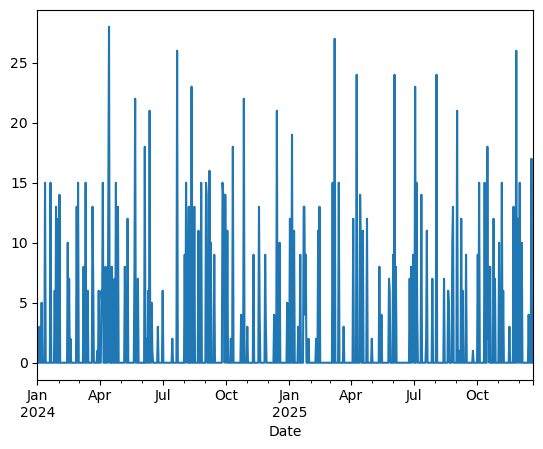

In [37]:
daily.plot()

C:\Users\Dell\AppData\Local\Temp\ipykernel_3740\1245693315.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = data["Lemonades"].resample("M").sum()


<Axes: xlabel='Date'>

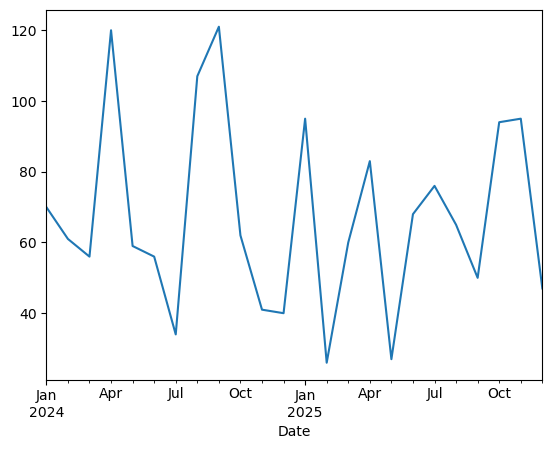

In [38]:
monthly = data["Lemonades"].resample("M").sum()

monthly.plot()

<Axes: xlabel='Date'>

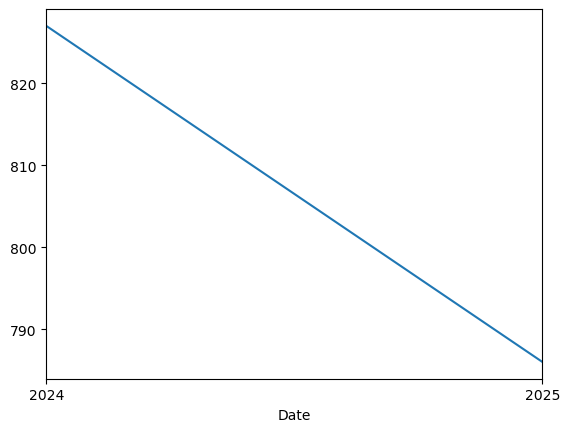

In [39]:
yearly = data["Lemonades"].resample("YE").sum()

yearly.plot()

<Axes: xlabel='Date'>

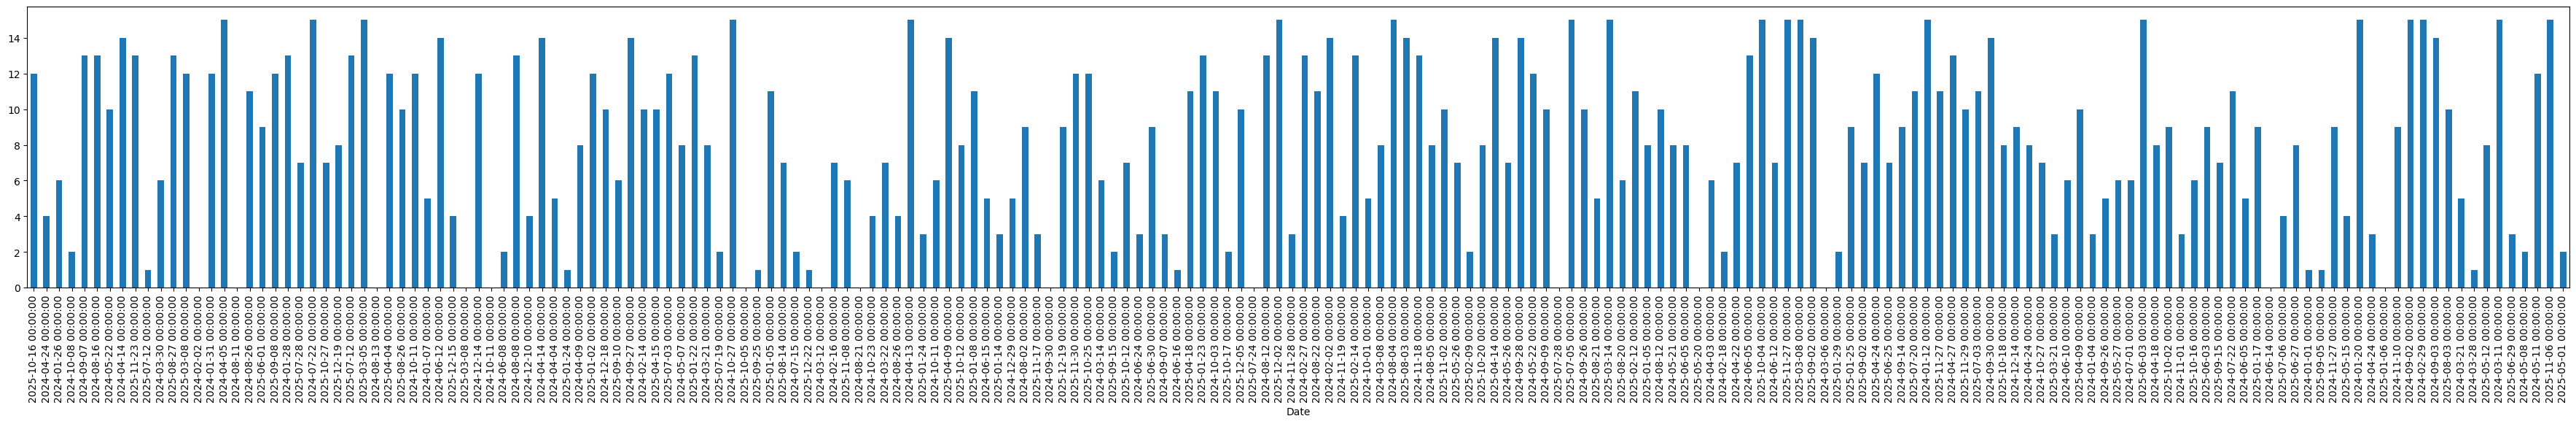

In [41]:
data['Lemonades'].plot(kind='bar',figsize=(45,5))

<Axes: xlabel='Date', ylabel='Lemonades'>

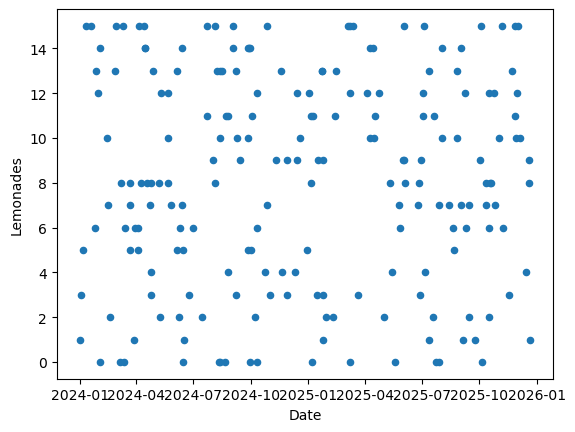

In [44]:
# y axis is always the frequency

data.reset_index().plot(kind="scatter", x="Date", y="Lemonades")